# Desafío - Dimensionalidad y Agrupación (I)

## Contexto
Para esta actividad utilizaremos un subconjunto de 25 items de la International Personality
Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar
perfiles de personalidad en base a una serie de oraciones asociadas a las características
Amabilidad, Escrupulosidad, Extroversión, Neuroticismo, Apertura Los individuos deben
responder qué tan adecuada es la oración respecto a su personalidad en base a 6
categorías:
<ul>
<li>1: No me representa para nada.</li>
<li>2: No me representa.</li>
<li>3: Algunas cosas no me representan.</li>
<li>4: Algunas cosas me representan.</li>
<li>5: Me representa.</li>
<li>6: Me representa completamente.</li>
</ul>

Las 25 preguntas son:
<ul>
<li><code>A1</code> Soy indiferente a los sentimientos de otros.</li>
<li><code>A2</code> Me preocupo del bienestar de otros.</li>
<li><code>A3</code> Sé cómo confortar a otros.</li>
<li><code>A4</code> Me agradan los niños.</li>
<li><code>A5</code> Hago sentir tranquila a la gente.</li>
<li><code>C1</code> Soy exacto en mi trabajo.</li>
<li><code>C2</code> Sigo con mis tareas hasta que todo esté perfecto.</li>
<li><code>C3</code> Hago cosas siguiendo un plan.</li>
<li><code>C4</code> Hago cosas con el mínimo esfuerzo.</li>
<li><code>C5</code> Pierdo mi tiempo.</li>
<li><code>E1</code> No hablo mucho con las personas.</li>
<li><code>E2</code> Me es difícil acercarme a otros.</li>
<li><code>E3</code> Sé cómo cautivar gente.</li>
<li><code>E4</code> Hago amigos de forma fácil.</li>
<li><code>E5</code> Puedo tomar el cargo de las cosas.</li>
<li><code>N1</code> Me enojo con facilidad.</li>
<li><code>N2</code> Me irrito con facilidad.</li>
<li><code>N3</code> Tengo cambios de humor frecuentes.</li>
<li><code>N4</code> Usualmente me siento melancólico.</li>
<li><code>N5</code> Entró en pánico con facilidad.</li>
<li><code>O1</code> Estoy lleno de ideas.</li>
<li><code>O2</code> Evito leer material difícil.</li>
<li><code>O3</code> Tiendo a llevar la conversación a niveles más altos.</li>
<li><code>O4</code> Dedico tiempo a la reflexión de cosas.</li>
<li><code>O5</code> No profundizaré sobre una materia específica.</li>
</ul>
Se registraron una serie de covariables sobre características demográficas de los
encuestados:
<ul>
<li><code>gender</code> Hombre = 1, Mujer =2.</li>
<li><code>education</code> 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 =
Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 =
Estudios de Postgrado.</li>
<li><code>age</code> Edad en Años.
Implementaremos un modelo de extracción factorial para identificar los principales perfiles
psicológicos.</li>
</ul>


## Desafío 1: Lectura de archivos
<ul>
<li>Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.</li>
<li>Importe la base de datos <code>bfi.csv</code> y asígnela a un objeto <code>df</code>.</li>
<li>Solicite las primeras 5 observaciones con <code>head</code>.</li>
</ul>

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import factor_analyzer as factor
import statsmodels.formula.api as smf
import missingno as msngo
df = pd.read_csv('bfi.csv')
df.head(5)


,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Desafío 2: Preprocesamiento
<ul>
<li>Elimine las columnas redundantes de la base, tal como <code>'Unnamed: 0'</code>.</li>
<li>Analice el patrón de datos perdidos con <code>missingno</code>. Comente cuáles son las
principales variables con mayores tasas de valores perdidos.</li>
<li>Genere un nuevo objeto donde almacenará la base sin valores perdidos.</li>
</ul>


<AxesSubplot:>

<Figure size 288x288 with 0 Axes>

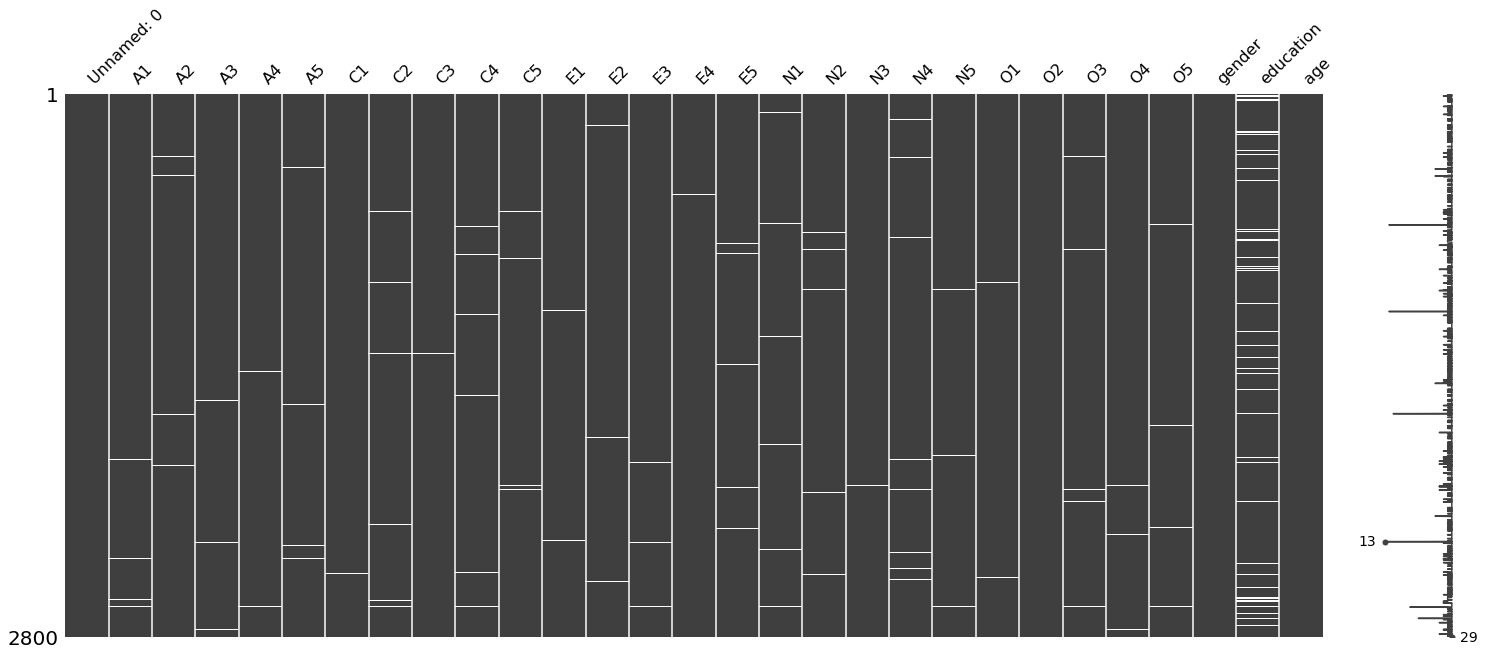

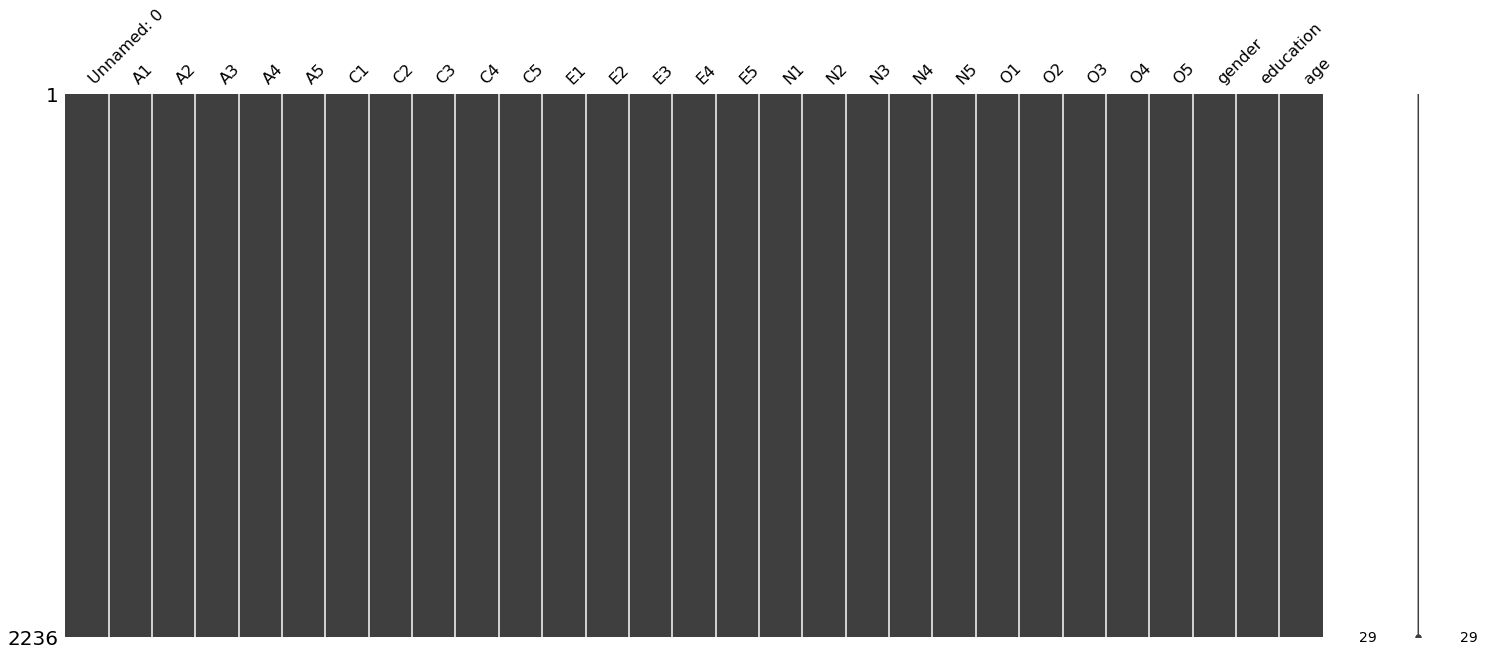

In [117]:
df.drop(columns=['Unnamed: 0'])
plt.figure(figsize=(4,4))
msngo.matrix(df)
cleanDf = df.dropna()
msngo.matrix(cleanDf)

Notamos que la columna con mayor datos perdidos es <code>education</code> luego un buen segundo sería la pregunta <code>N4</code>. Notamos que al depurar el dataframe, este queda con ~560 registros menos.

## Desafío 3: Descripción
<ul>
<li>Separe en un nuevo objeto <code>DataFrame</code> la batería de preguntas a extraer.</li>
<li>Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr
con un dotplot.</li>
<li>Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con <code>heatmap</code>.
Comente sobre los principales patrones de correlación entre las preguntas de la
batería.</li>
</ul>


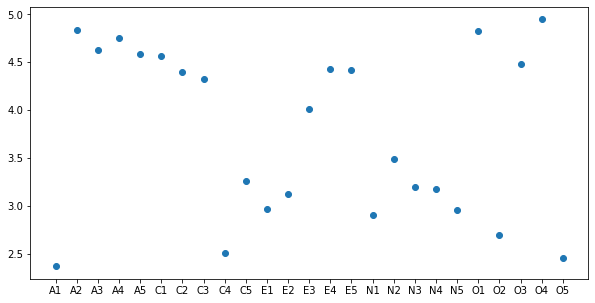

In [118]:
questionsDf = cleanDf.loc[:, 'A1': 'O5']
plt.figure(figsize=(10,5))
plt.plot(questionsDf.mean(), marker='o', linestyle='none')

<AxesSubplot:>

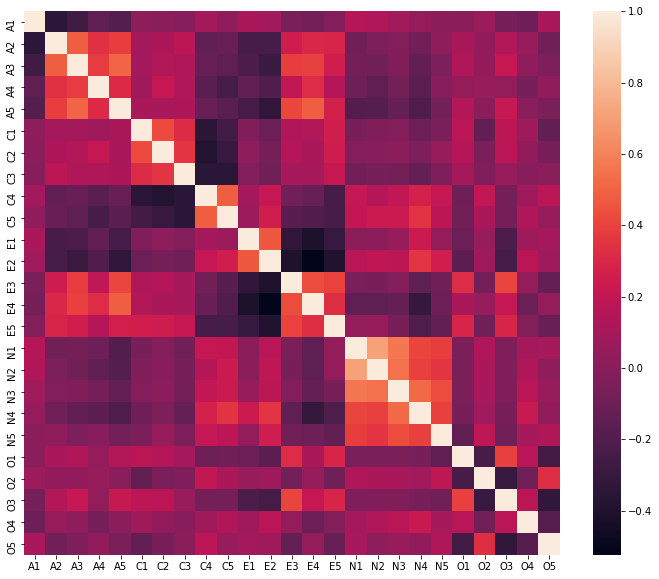

In [119]:
plt.figure(figsize=(12,10))
sns.heatmap(questionsDf.corr())

Se puede observar que hay ciertos grupos que presentan una correlacion mas fuerte que el resto. Esto es una proporcionalidad directa entre las del grupo <code>N</code> con las de su mismo grupo, parecido es el grupo <code>A</code> (con excepción de <code>A1</code> que presenta una inversa frente a las otras de su grupo). También se ve la proporcionalidad inversa mas fuerte entre <code>E2</code> y <code>E4</code>, asi mismo para sus aledañas del grupo <code>E</code> y las finales del grupo <code>C</code>

## Desafío 4: Extracción de factores
<ul>
<li>Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de
preguntas para realizar un análisis factorial mediante la prueba de esfericidad de
Barlett y Kaiser-Meyer-Olkin. Comente los resultados.</li>
<li>Instancie un objeto con <code>FactorAnalyzer()</code> donde se estimen 10 dimensiones
latentes y no se aplique rotación.</li>
<li>Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones
estimables.</li>
<li>Refactoriza el objeto con <code>FactorAnalyzer()</code> para incluir la cantidad de dimensiones
válidas que informó el scree plot.</li>
<li>Extraiga las cargas λ del modelo e identifique qué ítems están asociados a cada
factor. Comente sobre qué significa cada factor construído.</li>
</ul>


In [120]:
# Prueba de esfericidad de Barlett
factor.calculate_bartlett_sphericity(questionsDf)


(16509.673550497206, 0.0)

In [121]:
# Prueba KMO
factor.calculate_kmo(questionsDf)

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833752)

Vemos que la prueba de esfericidad nos da un valor bastante bueno, lo suficiente como para tener un p valor igual a cero. Vemos también que la prueba KMO nos entrega valores suficientemente buenos ya que todos están sobre 0.7, de todos modos notamos que hay ciertas variables que estan a solo ~0.05 puntos de llegar al límite de lo aceptable.

TypeError: 'str' object is not callable

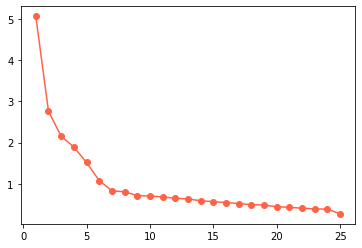

In [122]:
factores = factor.FactorAnalyzer(n_factors=10).fit(questionsDf)
factor_screeplot = factores.get_eigenvalues()[0]
plt.plot(np.array(range(len(factor_screeplot))) + 1, factor_screeplot, 'o-',
color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
# visualizamos el criterio de corte
plt.axhline(1)
plt.title("Scree plot")

Notamos que la cantidad de dimensiones válidas sería de 6, por lo que procedemos a refactorizar el modelo

In [ ]:
refactores = factor.FactorAnalyzer(n_factors=6)
refactores.fit(questionsDf)

lambdaCols = list(map(lambda x: 'Factor{}'.format(x + 1), range(6)))
lambdaDf = pd.DataFrame([],columns=lambdaCols)
for i, values in enumerate(refactores.loadings_):
    lambdaDf.loc[questionsDf.columns[i]] = values
lambdaDf.applymap(lambda x: np.where(x < .4 and x > -.4, ' ', round(x, 2)))


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,,,,,-0.62,
A2,,,,,0.64,
A3,,,,,0.49,
A4,,,,,,
A5,,,,,,
C1,,,0.59,,,
C2,,,0.74,,,
C3,,,0.61,,,
C4,,,-0.67,,,0.48
C5,,,-0.56,,,


Si filtramos y mostramos aquellos valores que tienen valor absoluto > .4, notamos que los principales grupos son igual a los grupos existentes ordenados según letra.

# Desafío 5: Modelación de factores
<ul>
<li>Extraiga los puntajes del modelo factorial a su base de datos.</li>
<li>Grafique la densidad de cada uno con <code>kdplot</code>.</li>
<li>Modele y comente brevemente sobre cuáles son los principales determinantes de
cada factor en base al siguiente modelo estimable:

$$
\bar{y} = \beta_0 + \beta_1 \cdot gender + \beta_2 \cdot education + \beta_3 \cdot age + \varepsilon_i
$$
</li>
</ul>

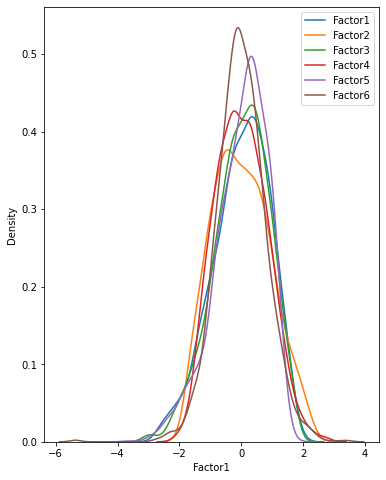

In [ ]:
extract_factor_scores = refactores.transform(questionsDf)
scoresCols = list(map(lambda x: 'Factor{}'.format(x + 1), range(6)))
scoresDf = pd.DataFrame([],columns=scoresCols)
for i, values in enumerate(extract_factor_scores):
    scoresDf.loc[i] = values

plt.figure(figsize=(6,8))
for i in scoresCols:
    sns.kdeplot(scoresDf[i], label=i)
plt.legend()

In [130]:
# Se unen los dataframes para generar las regresiones
personalDf = cleanDf.loc[:, 'gender' : 'age'].reset_index(drop=True)
factorizedDf = personalDf.join(scoresDf)
# Se implementan las regresiones para cada
for factor in scoresCols:
    model = smf.ols("{} ~ gender + education + age".format(factor), factorizedDf).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Factor1   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     13.33
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           1.26e-08
Time:                        13:45:28   Log-Likelihood:                -2962.8
No. Observations:                2236   AIC:                             5934.
Df Residuals:                    2232   BIC:                             5956.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4953      0.098     -5.080      0.0

Notamos que para la gran mayoría de las regresiones, <code>gender</code> es la que normalmente tiene mas peso con respecto al resto. Además podemos fijarnos que la gran mayoría de los modelos presentan un $R^2$ bastante bajo, y que <code>education</code> (con excepción de la regresión de <code>Factor4</code>) siempre tiene un p-value por sobre lo aceptable para dar confianza al modelo. 